In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
print(pd.__version__)

1.1.4


In [5]:
housing = pd.read_csv("/home/wayne/main/git/data/ch2/housing.csv")

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


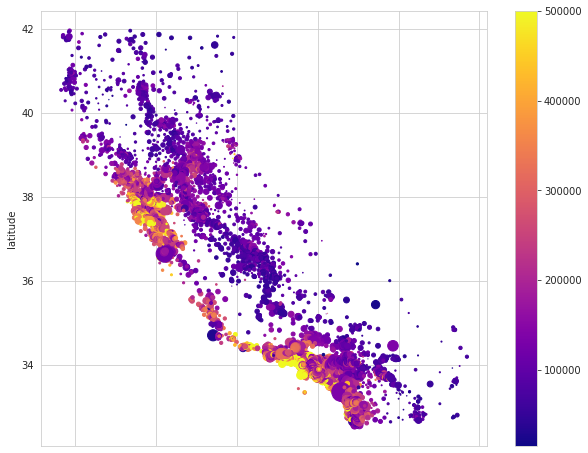

In [74]:
# plotting housing data
#plt.figure(figsize=(10,8))
housing.plot(kind="scatter", 
             x='longitude', 
             y='latitude', 
             s=housing['population']/100, 
             c=housing['median_house_value'],
            cmap = plt.get_cmap("plasma"),
            figsize=(10,8),
            colorbar=True)
plt.show()

### total_bedrooms has mssing data

In [8]:
housing.corr().style.background_gradient().set_precision(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000,-0.925,-0.108,0.045,0.070,0.100,0.055,-0.015,-0.046
latitude,-0.925,1.000,0.011,-0.036,-0.067,-0.109,-0.071,-0.080,-0.144
housing_median_age,-0.108,0.011,1.000,-0.361,-0.320,-0.296,-0.303,-0.119,0.106
total_rooms,0.045,-0.036,-0.361,1.000,0.930,0.857,0.918,0.198,0.134
total_bedrooms,0.070,-0.067,-0.320,0.930,1.000,0.878,0.980,-0.008,0.050
population,0.100,-0.109,-0.296,0.857,0.878,1.000,0.907,0.005,-0.025
households,0.055,-0.071,-0.303,0.918,0.980,0.907,1.000,0.013,0.066
median_income,-0.015,-0.080,-0.119,0.198,-0.008,0.005,0.013,1.000,0.688
median_house_value,-0.046,-0.144,0.106,0.134,0.050,-0.025,0.066,0.688,1.000


In [9]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5.0, 5.0, inplace=True)

In [10]:
# adding rooms_per_household (RPH)
housing['RPH'] = housing['total_rooms']/housing['households']
# adding bedrooms_per_household (BPH)
housing['BPH'] = housing['total_bedrooms']/housing['households']
# adding bedrooms_per_romm (BPR)
housing['BPR'] = housing['total_bedrooms']/housing['total_rooms']
# adding people_per_household (PPH)
housing['PPH'] = housing['population']/housing['households']

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,RPH,BPH,BPR,PPH
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0,6.984127,1.023810,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0,6.238137,0.971880,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0,8.288136,1.073446,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0,5.817352,1.073059,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0,6.281853,1.081081,0.172096,2.181467


In [13]:
# deal with missing data in total_belp

# deal with missing data in total_bedrooms
housing_nulls = housing[housing.isnull().any(axis=1)]
print(len(housing))
print(len(housing_nulls))
housing_nulls.head()


20640
207


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,RPH,BPH,BPR,PPH
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,3.0,5.761468,NaN,NaN,2.614679
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,2.0,3.830116,NaN,NaN,2.826255
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2.0,4.048704,NaN,NaN,2.938727
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,4.0,6.102740,NaN,NaN,2.630137
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,3.0,4.633540,NaN,NaN,2.403727


In [14]:
housing.fillna(housing.mean(),inplace=True)
#housing.iloc[209][:]
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [44]:
housing.loc[housing['ocean_proximity']=='ISLAND', 'ocean_proximity'] = 'NEAR OCEAN'

In [45]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
 10  income_cat          20640 non-null  float64
 11  RPH                 20640 non-null  float64
 12  BPH                 20640 non-null  float64
 13  BPR                 20640 non-null  float64
 14  PPH                 20640 non-null  float64
dtypes: float64(14), object(1)
memory usage: 2.4+ MB


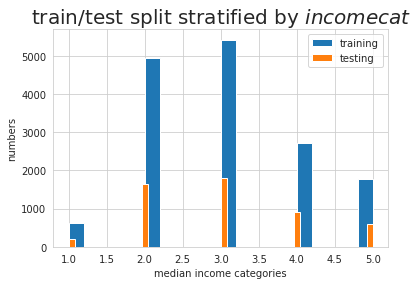

In [46]:
from sklearn.model_selection import train_test_split
housing_train, housing_test = train_test_split(housing,
                                               test_size=0.25,
                                                random_state=404,
                                              stratify = housing['income_cat'])
plt.figure(figsize=(6,4))
                                               
plt.hist(housing_train['income_cat'], bins=20, label="training")
plt.hist(housing_test['income_cat'], bins=50, label="testing")
plt.xlabel("median income categories")
plt.ylabel("numbers")
plt.legend()
plt.title("train/test split stratified by $income cat$", fontsize=20)
plt.show() 

In [47]:
### categorical features: ["income_cat", "ocean_proximity"]
cat_feats =  ["income_cat", "ocean_proximity"]
# numerical features: ["housing_median_age", "total_rooms", "population", "households", "RPH", "BPH", "BPR", "PPH"]
num_feats =  ["housing_median_age", "total_rooms", "population", "households","RPH", "BPH", "BPR", "PPH"]

In [48]:
def one_hot_1(df):
    df_copy = df.copy()
    one_hot = pd.get_dummies(df['income_cat'])
    new_feats = [str(x) for x in list(one_hot.columns)]
    df_copy[new_feats[:-1]] = one_hot[one_hot.columns[:-1]]
    keep = list(df_copy.columns)
    keep.remove('income_cat')
    return df_copy[keep]

def one_hot_2(df):
    df_copy = df.copy()
    one_hot = pd.get_dummies(df['ocean_proximity'])
    new_feats = [str(x) for x in list(one_hot.columns)]
    df_copy[new_feats[:-1]] = one_hot[one_hot.columns[:-1]]
    keep = list(df_copy.columns)
    keep.remove('ocean_proximity')
    return df_copy[keep]

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
        self.feats = ["housing_median_age", "total_rooms", "population", "households","RPH", "BPH", "BPR", "PPH"]
    def fit(self, X, y=None):
        self.scaler.fit(X[self.feats])
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy[self.feats] = self.scaler.transform(X_copy[self.feats])
        return X_copy
        

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression

In [51]:
pipe = Pipeline([("scaler",CustomScaler()),
                ("one_hot_1",FunctionTransformer(one_hot_1, validate=False)),
                ("one_hot_2",FunctionTransformer(one_hot_2, validate=False)),
                ("reg", LinearRegression())])

In [52]:
copy = housing_test.copy()
copy.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,RPH,BPH,BPR,PPH
18596,-122.09,37.07,33.0,3581.0,734.0,1780.0,663.0,4.3429,214300.0,NEAR OCEAN,3.0,5.401207,1.107089,0.204971,2.684766
3582,-118.55,34.24,21.0,5751.0,1082.0,2230.0,1016.0,4.3458,407500.0,<1H OCEAN,3.0,5.660433,1.064961,0.188141,2.194882
7846,-118.16,33.89,38.0,483.0,113.0,389.0,108.0,2.1859,143800.0,<1H OCEAN,2.0,4.472222,1.046296,0.233954,3.601852
2873,-118.96,35.37,41.0,1463.0,339.0,1066.0,318.0,1.7467,52400.0,INLAND,2.0,4.600629,1.066038,0.231716,3.352201
17532,-121.89,37.34,20.0,1106.0,494.0,851.0,448.0,0.8894,350000.0,<1H OCEAN,1.0,2.468750,1.102679,0.446655,1.899554


In [53]:
test_scl = CustomScaler()
copy_scaled = test_scl.fit_transform(copy)
copy_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,RPH,BPH,BPR,PPH
18596,-122.09,37.07,0.363970,0.451078,734.0,0.330327,0.430982,4.3429,214300.0,NEAR OCEAN,3.0,-0.007650,0.017220,-0.145334,-0.028390
3582,-118.55,34.24,-0.600594,1.463936,1082.0,0.747016,1.358100,4.3458,407500.0,<1H OCEAN,3.0,0.085556,-0.054193,-0.441993,-0.056731
7846,-118.16,33.89,0.765872,-0.994929,113.0,-0.957702,-1.026669,2.1859,143800.0,<1H OCEAN,2.0,-0.341673,-0.085831,0.365572,0.024666
2873,-118.96,35.37,1.007013,-0.537509,339.0,-0.330818,-0.475125,1.7467,52400.0,INLAND,2.0,-0.295503,-0.052367,0.326108,0.010223
17532,-121.89,37.34,-0.680974,-0.704141,494.0,-0.529902,-0.133694,0.8894,350000.0,<1H OCEAN,1.0,-1.062035,0.009743,4.114910,-0.073817


In [54]:
#all_feats = cat_feats.extend(num_feats)
print(cat_feats)
print(num_feats)
all_feats = cat_feats+num_feats
print(all_feats)
copy_toFit=copy[all_feats]

['income_cat', 'ocean_proximity']
['housing_median_age', 'total_rooms', 'population', 'households', 'RPH', 'BPH', 'BPR', 'PPH']
['income_cat', 'ocean_proximity', 'housing_median_age', 'total_rooms', 'population', 'households', 'RPH', 'BPH', 'BPR', 'PPH']


In [55]:
copy_toFit.head()

,income_cat,ocean_proximity,housing_median_age,total_rooms,population,households,RPH,BPH,BPR,PPH
18596,3.0,NEAR OCEAN,33.0,3581.0,1780.0,663.0,5.401207,1.107089,0.204971,2.684766
3582,3.0,<1H OCEAN,21.0,5751.0,2230.0,1016.0,5.660433,1.064961,0.188141,2.194882
7846,2.0,<1H OCEAN,38.0,483.0,389.0,108.0,4.472222,1.046296,0.233954,3.601852
2873,2.0,INLAND,41.0,1463.0,1066.0,318.0,4.600629,1.066038,0.231716,3.352201
17532,1.0,<1H OCEAN,20.0,1106.0,851.0,448.0,2.468750,1.102679,0.446655,1.899554


In [56]:
copy_onehot1 = one_hot_1(copy_toFit)
print(list(copy_onehot1.columns))

['ocean_proximity', 'housing_median_age', 'total_rooms', 'population', 'households', 'RPH', 'BPH', 'BPR', 'PPH', '1.0', '2.0', '3.0', '4.0']


In [57]:
copy_onehot2 = one_hot_2(copy_onehot1)
print(list(copy_onehot2.columns))

['housing_median_age', 'total_rooms', 'population', 'households', 'RPH', 'BPH', 'BPR', 'PPH', '1.0', '2.0', '3.0', '4.0', '<1H OCEAN', 'INLAND', 'NEAR BAY']


In [58]:
final_features = list(copy_onehot2.columns)

In [61]:
pipe.fit(housing_train[all_feats], housing_train['median_house_value'])

Pipeline(memory=None,
     steps=[('scaler', CustomScaler()), ('one_hot_1', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function one_hot_1 at 0x7faacca342f0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=False)), ('one_hot_2', FunctionTra..., ('reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [62]:
X_train = housing_train[all_feats].to_numpy()
X_test = housing_test[all_feats].to_numpy()
print(X_train.shape)
print(X_test.shape)
y_pred_train = pipe.predict(housing_train[all_feats])
y_pred_test = pipe.predict(housing_test[all_feats])

(15480, 10)
(5160, 10)


In [65]:
def get_mse_model(model, X, y):
    X_np = np.array(X)
    y_pred = model.predict(X_np)
    yy = np.array(y)
    return np.sum(np.power(y_pred-yy.ravel(), 2))/len(X)
def get_mse(y_pred, y):
    return np.sum(np.power(y_pred-y, 2))/len(y)

In [68]:
y_train = np.array(housing_train['median_house_value'])
y_test = np.array(housing_test['median_house_value'])
mse_train = get_mse(y_pred_train, y_train)
mse_test = get_mse(y_pred_test, y_test)

In [69]:
print("the training mse is: ", mse_train)
print("the testing mse is: ", mse_test)

the training mse is:  5195462192.586024
the testing mse is:  5146408879.05277


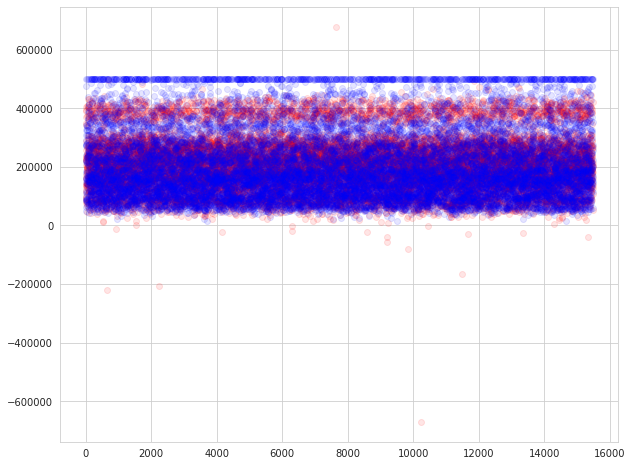

In [81]:
dummy_x = np.arange(len(y_train))
plt.figure(figsize=(10,8))
plt.scatter(dummy_x, y_pred_train, c='r', label="pred", alpha=0.1)
plt.scatter(dummy_x, y_train, c='b', label="real",alpha=0.1)
plt.show()